In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

# ROUGE scores, from peft_fine_tune.ipynb
# These scores are manually set for the purpose of plottinhg and comparison.

original_model = {
    'rouge1': float(np.float64(0.2334158581572823)),
    'rouge2': float(np.float64(0.07603964187010573)),
    'rougeL': float(np.float64(0.20145520923859048)),
    'rougeLsum': float(np.float64(0.20145899339006135))
}

instruct_model = {
    'rouge1': float(np.float64(0.42161291557556113)),
    'rouge2': float(np.float64(0.18035380596301792)),
    'rougeL': float(np.float64(0.3384439349963909)),
    'rougeLsum': float(np.float64(0.33835653595561666))
}

peft_model = {
    'rouge1': float(np.float64(0.40810631575616746)),
    'rouge2': float(np.float64(0.1633255794568712)),
    'rougeL': float(np.float64(0.32507074586565354)),
    'rougeLsum': float(np.float64(0.3248950182867091))
}

# Save scores as JSON
manual_scores = {
    'original_model': original_model,
    'instruct_model': instruct_model,
    'peft_model': peft_model
}

with open("../assets/rouge_scores.json", "w") as f:
    json.dump(manual_scores, f, indent=4)

# Prepare data for plotting
categories = list(original_model.keys())
original_scores = [original_model[metric] for metric in categories]
instruct_scores = [instruct_model[metric] for metric in categories]
peft_scores = [peft_model[metric] for metric in categories]

# Plotting
x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, original_scores, width, label='Original Model', color='#1f77b4')
bars2 = ax.bar(x, instruct_scores, width, label='Instruct Model', color='#ff7f0e')
bars3 = ax.bar(x + width, peft_scores, width, label='PEFT Model', color='#2ca02c')

ax.set_ylabel('ROUGE Score')
ax.set_title('ROUGE Score Comparison: Original vs Instruct vs PEFT Model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.bar_label(bars1, fmt='%.3f', padding=3)
ax.bar_label(bars2, fmt='%.3f', padding=3)
ax.bar_label(bars3, fmt='%.3f', padding=3)
fig.tight_layout()

# Save plot image
plot_path = "../assets/rouge_comparison_plot.png"
plt.savefig(plot_path)
plt.close()

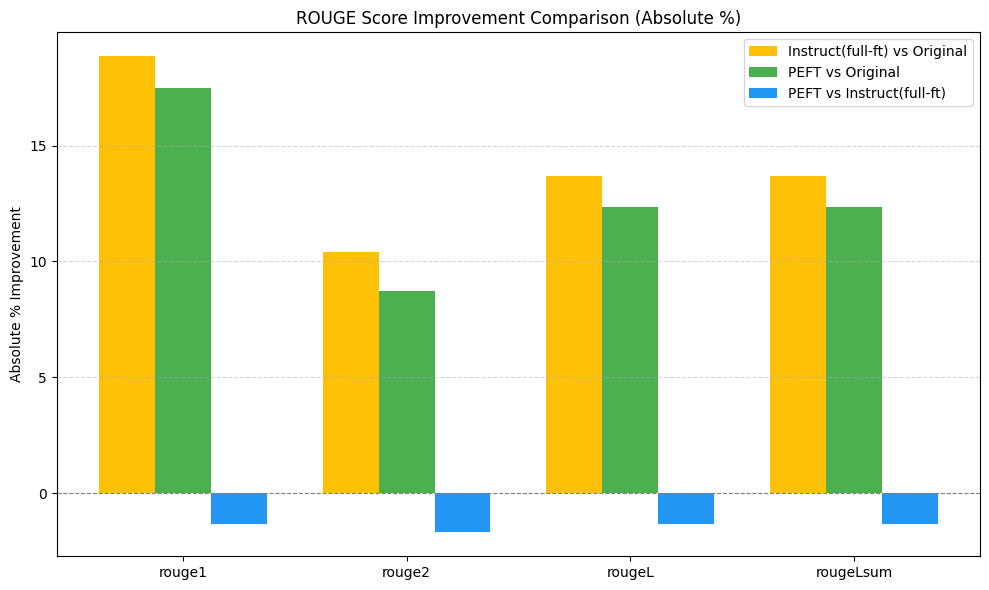

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Metric names
metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
x = np.arange(len(metrics))  # For plotting

# Absolute percentage improvements
improvements = {
    "INSTRUCT(full-ft) over ORIGINAL": {
        "rouge1": 18.86,
        "rouge2": 10.41,
        "rougeL": 13.70,
        "rougeLsum": 13.69
    },
    "PEFT over ORIGINAL": {
        "rouge1": 17.47,
        "rouge2": 8.73,
        "rougeL": 12.36,
        "rougeLsum": 12.34
    },
    "PEFT over INSTRUCT(full-ft)": {
        "rouge1": -1.35,
        "rouge2": -1.70,
        "rougeL": -1.34,
        "rougeLsum": -1.35
    }
}

# Save as JSON
with open("../assets/rouge_improvements.json", "w") as f:
    json.dump(improvements, f, indent=4)

# Prepare data for plotting
width = 0.25
bar1 = [improvements["INSTRUCT(full-ft) over ORIGINAL"][m] for m in metrics]
bar2 = [improvements["PEFT over ORIGINAL"][m] for m in metrics]
bar3 = [improvements["PEFT over INSTRUCT(full-ft)"][m] for m in metrics]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, bar1, width, label="Instruct(full-ft) vs Original", color="#FFC107")
plt.bar(x, bar2, width, label="PEFT vs Original", color="#4CAF50")
plt.bar(x + width, bar3, width, label="PEFT vs Instruct(full-ft)", color="#2196F3")

# Labels and formatting
plt.ylabel("Absolute % Improvement")
plt.title("ROUGE Score Improvement Comparison (Absolute %)")
plt.xticks(x, metrics)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save plot
plt.tight_layout()
plt.savefig("../assets/rouge_improvement_comparison.png", dpi=300)
plt.show()

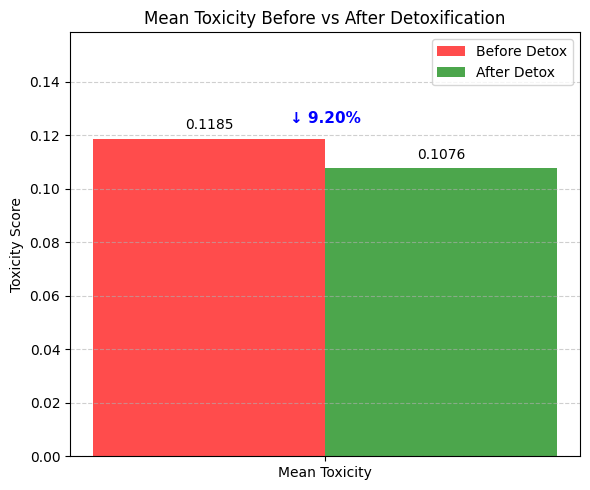

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Mean Toxicity']
before = [0.1185]
after = [0.1076]

# Percentage improvement (mean toxicity ↓)
improvement = [9.20]  # in %

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(6, 5))

# Bar plot for before and after
rects1 = ax1.bar(x - width/2, before, width, label='Before Detox', color='red', alpha=0.7)
rects2 = ax1.bar(x + width/2, after, width, label='After Detox', color='green', alpha=0.7)

# Labels, title, and legend
ax1.set_ylabel('Toxicity Score')
ax1.set_title('Mean Toxicity Before vs After Detoxification')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper right')

# Annotate bars
def autolabel(rects, values):
    for rect, value in zip(rects, values):
        height = rect.get_height()
        ax1.annotate(f'{value:.4f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 5),  # offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1, before)
autolabel(rects2, after)

# Add improvement annotation
for i, pct in enumerate(improvement):
    ax1.text(x[i], max(before[i], after[i]) + 0.005,
             f'↓ {pct:.2f}%',
             ha='center', va='bottom', fontsize=11, color='blue', fontweight='bold')

plt.ylim(0, max(before + after) + 0.04)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()